In [8]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

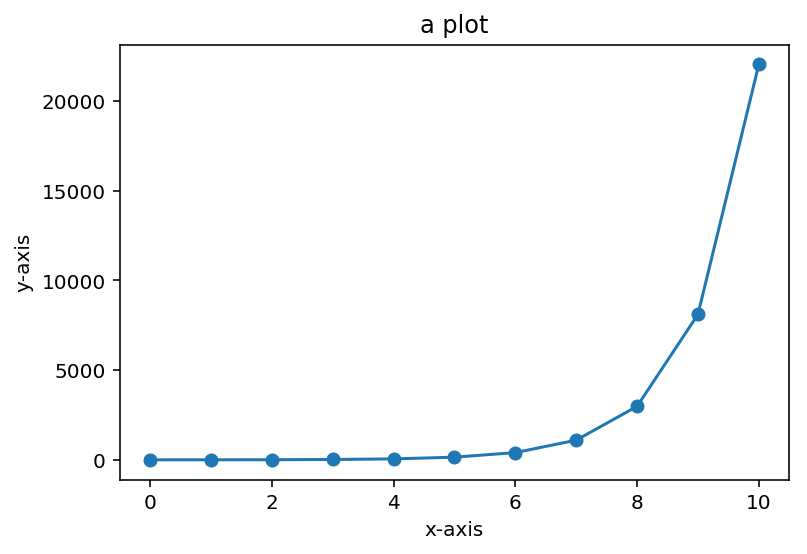

In [24]:
x = np.linspace(0,10,11)
y = np.exp(x)
fig = plt.figure()
ax = plt.gca()
ax.plot(x,y,'o-');
ax.set(title='a plot',xlabel='x-axis',ylabel='y-axis');

The plot shown above was created with the default settings of matplotlib. It looks good in the notebook, but it is not suitable for all purposes. For example, in a paper you need to have a high information density, hence you want a smaller plot. For a presentation or poster, the text needs to be readable at distance, en especially for presentation you need to make sure that your lines are thick enough to be visible (always expect to present in a room with a crappy projector and a lot of daylight).

# Making a paper ready plot

The first step of making the figure publication ready to change it's size. Let's say that we want to have 4 square plots in a row and an a4 page is 21 cm wide and has 2.5 cm margins. 
* Compute how wide a plot should be.
* Look in the documentation for `figsize` in the documentation of `plt.figure` and use it to change the size of your plot

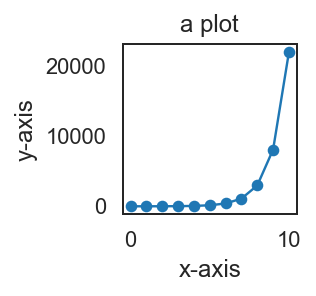

In [82]:
# compute the plot size and store
w_cm = (21-2*2.5)/4
w_inch = 0.39*w_cm
x = np.linspace(0,10,11)
y = np.exp(x)
# use figsize to set the actual figure size
fig = plt.figure(figsize=(w_inch,w_inch))
ax = plt.gca()
ax.plot(x,y,'o-');
ax.set(title='a plot',xlabel='x-axis',ylabel='y-axis');

Now the plot is so small, the markers look a bit big. The size of the markers can be changed in the plot command with the argument `markersize`. Use `markersize` to make the markers a bit smaller.

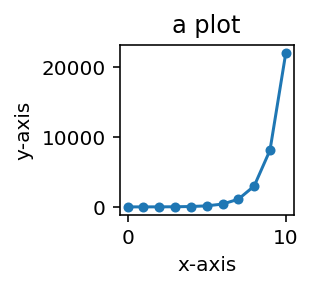

In [27]:
# compute the plot size and store
w_cm = (21-2*2.5)/4
w_inch = 0.39*w_cm
x = np.linspace(0,10,11)
y = np.exp(x)
# use figsize to set the actual figure size
fig = plt.figure(figsize=(w_inch,w_inch))
ax = plt.gca()
# add markersize to the plot function
ax.plot(x,y,'o-',markersize=4);
ax.set(title='a plot',xlabel='x-axis',ylabel='y-axis');

Journals often have requirements for the font sizes in figures. To set the font size for specific elements, we have to replace the `ax.set` command with specific commands for each label, e.g.:

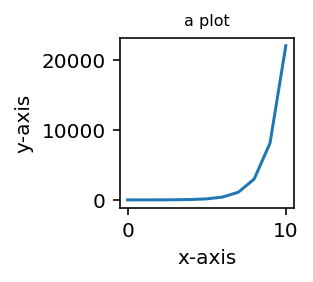

In [10]:
w_cm = (21-2*2.5)/4
w_inch = 0.39*w_cm
x = np.linspace(0,10,11)
y = np.exp(x)
fig = plt.figure(figsize=(w_inch,w_inch))
ax = plt.gca()
ax.plot(x,y,'o-',markersize=4);
ax.set_title('a plot',fontsize=8)
ax.set(xlabel='x-axis',ylabel='y-axis');

Similar commands exist for the xlabel (`ax.set_xlabel`) and ylabel (`ax.set_ylabel`). Create a plot according to the following guidelines:

* font size title = 12pt
* font size x and y labels = 10pt

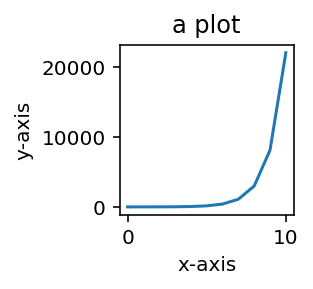

In [12]:
# compute the plot size and store
w_cm = (21-2*2.5)/4
w_inch = 0.39*w_cm
x = np.linspace(0,10,11)
y = np.exp(x)
# use figsize to set the actual figure size
fig = plt.figure(figsize=(w_inch,w_inch))
ax = plt.gca()
# add markersize to the plot function
ax.plot(x,y,'o-',markersize=4);
# set title and font size
ax.set_title('a plot',fontsize=12);
# set xlabel and font size
ax.set_xlabel('x-axis',fontsize=10);
# set ylabel and font size
ax.set_ylabel('y-axis',fontsize=10);


Setting the font size for the tick labels (the numbers on the axes) is a bit differnet. For this we use the `ax.tick_params` function. This function gives you full control of the ticks and the tick labels. Look throught the documentation of `ax.tick_params` to find the parameter that changes the font size of the labels and set this to 8 points. 

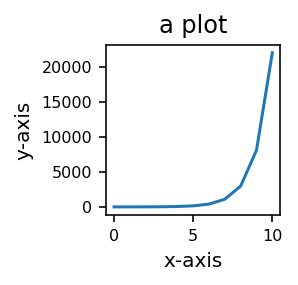

In [16]:
# compute the plot size and store
w_cm = (21-2*2.5)/4
w_inch = 0.39*w_cm
x = np.linspace(0,10,11)
y = np.exp(x)
# use figsize to set the actual figure size
fig = plt.figure(figsize=(w_inch,w_inch))
ax = plt.gca()
# add markersize to the plot function
ax.plot(x,y,'o-',markersize=4);
# set title and font size
ax.set_title('a plot',fontsize=12);
# set xlabel and font size
ax.set_xlabel('x-axis',fontsize=10);
# set ylabel and font size
ax.set_ylabel('y-axis',fontsize=10);
# use tick_params to set the labelsize for both axis
ax.tick_params(axis='both', labelsize=8,)


# Making a presentation ready plot

In the previous section you made a tiny plot with tiny fonts. Now, use the same methods to make a plot according to the following specification:
* size: 10x10 cm
* font size title: 20pt
* font size axes labels: 18pt
* font size tick labels: 16pt

And make sure to change to marker size such that the markers have a reasonable size.

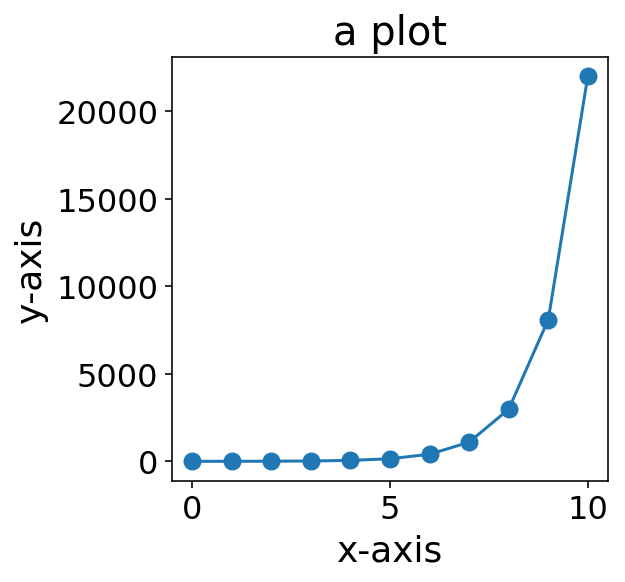

In [30]:
w_inch = 0.39*10
x = np.linspace(0,10,11)
y = np.exp(x)
fig = plt.figure(figsize=(w_inch,w_inch))
ax = plt.gca()
ax.plot(x,y,'o-',markersize=8);
ax.set_title('a plot',fontsize=20);
ax.set_xlabel('x-axis',fontsize=18);
ax.set_ylabel('y-axis',fontsize=18);
ax.tick_params(axis='both', labelsize=16,)

This plot and the fonts are now big, but the line is still very thin and may not be visible. The line width can be changed by changing the `linewidth` in the plot function; use this uption to make the line much thicker:

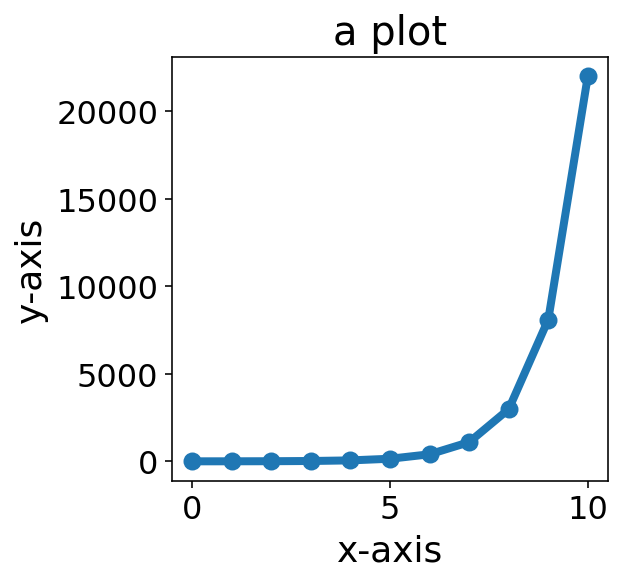

In [31]:
w_inch = 0.39*10
x = np.linspace(0,10,11)
y = np.exp(x)
fig = plt.figure(figsize=(w_inch,w_inch))
ax = plt.gca()
# set linewidth in plot
ax.plot(x,y,'o-',markersize=8,linewidth=4);
ax.set_title('a plot',fontsize=20);
ax.set_xlabel('x-axis',fontsize=18);
ax.set_ylabel('y-axis',fontsize=18);
ax.tick_params(axis='both', labelsize=16,)

# Controlling figure aesthetics with Seaborn

As you have seen in the previous few exercises, it is possible to modify your plots, but it can be quite some work. One way to make this easier is by using seaborn *styles* and *contexts*. Seaborn styles control the overall look of a plot and seaborn contexts hold properties that should be context dependent such as font size and line width. 

Seaborn has 5 styles: `darkgrid`, `whitegrid`, `dark`, `white`, and `ticks` which can be set with `sns.set_style("style_name")`. Add this to the code below and see how each style looks:

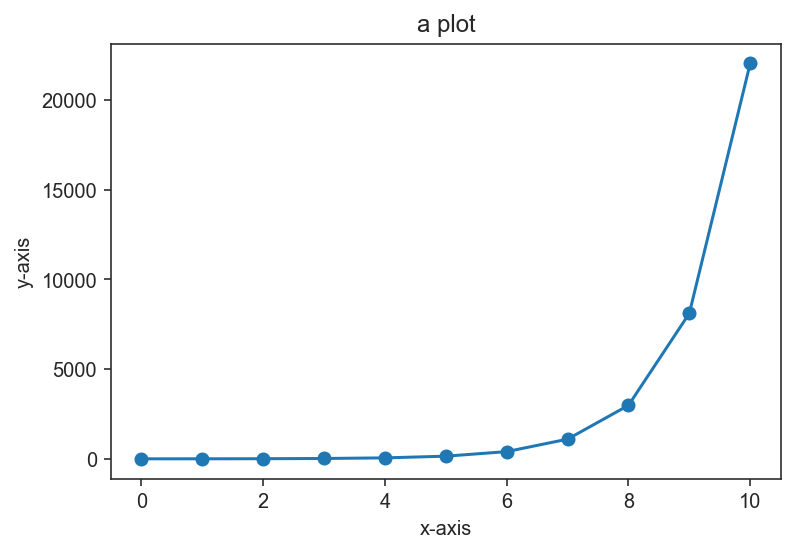

In [38]:
sns.set_style("ticks")
#sns.set_style("darkgrid")
#sns.set_style("whitegrid")
#sns.set_style("dark")
#sns.set_style("white")
x = np.linspace(0,10,11)
y = np.exp(x)
fig = plt.figure()
ax = plt.gca()
ax.plot(x,y,'o-');
ax.set(title='a plot',xlabel='x-axis',ylabel='y-axis');

You can further customize your plot by changing seaborn's settings. The style settings are stored in a dictionary which you can get with `sns.axes_style("style-name")`. When setting the style, you can provide a custom dictionary with the elements you want to change: `sns.set_style('ticks',rc={"property-name":"custom-value"}`. Use this to achieve the following:
* A plot with the `ticks` style and a grid in the background
* A plot with the `ticks` style with no line (spines) on the top or on the right

In [85]:
# list options
sns.axes_style("dark").keys()

dict_keys(['figure.facecolor', 'axes.labelcolor', 'xtick.direction', 'ytick.direction', 'xtick.color', 'ytick.color', 'axes.axisbelow', 'grid.linestyle', 'text.color', 'font.family', 'font.sans-serif', 'lines.solid_capstyle', 'patch.edgecolor', 'patch.force_edgecolor', 'image.cmap', 'xtick.top', 'ytick.right', 'axes.grid', 'axes.facecolor', 'axes.edgecolor', 'grid.color', 'axes.spines.left', 'axes.spines.bottom', 'axes.spines.right', 'axes.spines.top', 'xtick.bottom', 'ytick.left'])

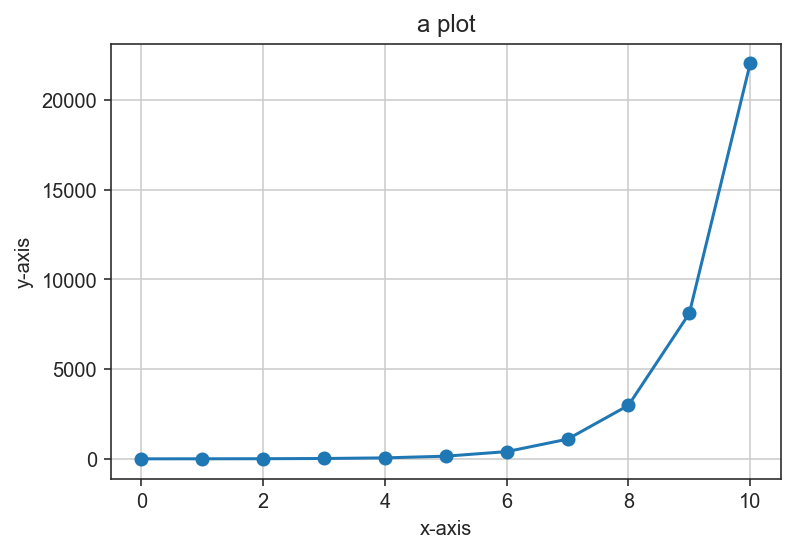

In [40]:
sns.set_style("ticks",rc={"axes.grid":True})
x = np.linspace(0,10,11)
y = np.exp(x)
fig = plt.figure()
ax = plt.gca()
ax.plot(x,y,'o-');
ax.set(title='a plot',xlabel='x-axis',ylabel='y-axis');

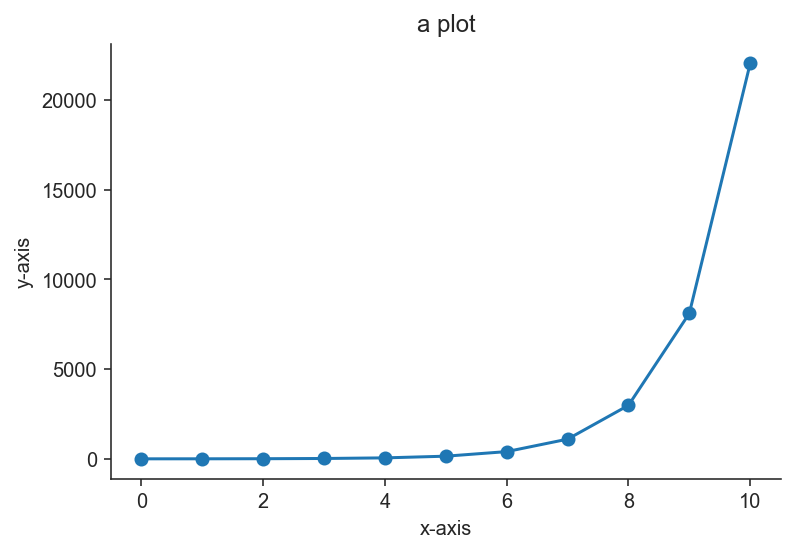

In [44]:
sns.set_style("ticks",{"axes.spines.top":False,"axes.spines.right":False})
x = np.linspace(0,10,11)
y = np.exp(x)
fig = plt.figure()
ax = plt.gca()
ax.plot(x,y,'o-');
ax.set(title='a plot',xlabel='x-axis',ylabel='y-axis');

Next, we go to seaborn contexts. With these contexts we can essentially scale our plots and make them suitable for a paper or presentation with a single command (or maybe a few). Seaborn has four contexts: `paper`, `notebook`, `talk`, and `poster` which are activated with the command `sns.set_context("context-name")`. Try this out

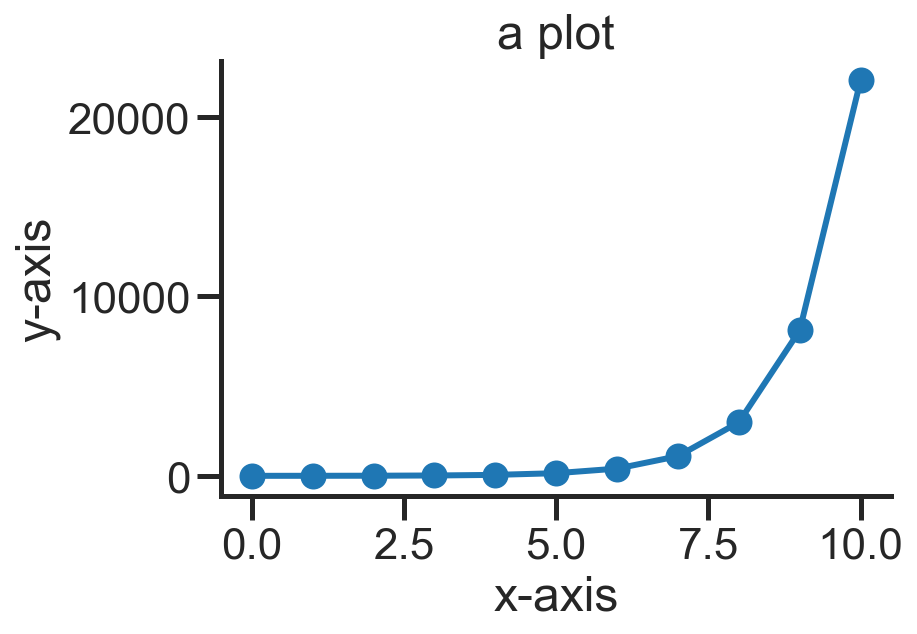

In [48]:
sns.set_context("poster")
#sns.set_context("talk")
#sns.set_context("notebook")
#sns.set_context("paper")
x = np.linspace(0,10,11)
y = np.exp(x)
fig = plt.figure()
ax = plt.gca()
ax.plot(x,y,'o-');
ax.set(title='a plot',xlabel='x-axis',ylabel='y-axis');

Note that your plot will have the style from the last `set_style` command; these two commands work together. 

Like with styles, you can customize the context settings. The context settings can be found with `sns.plotting_context("context-name")` and anything from this can be customized when calling `sns.set_context`, e.g. `sns.set_context('ticks',rc={"property-name":"custom-value"}`. Use this to achieve the following:
* A plot in the `talk` style with lines of with 1
* A plot in the `paper` style with grid lines of with 5 (make sure to use a style that shows these!). 
* A plot in the `paper` style where all fontsizes are ~25% larger than the defaults.

In [84]:
# list options
sns.plotting_context('paper').keys()

dict_keys(['font.size', 'axes.labelsize', 'axes.titlesize', 'xtick.labelsize', 'ytick.labelsize', 'legend.fontsize', 'axes.linewidth', 'grid.linewidth', 'lines.linewidth', 'lines.markersize', 'patch.linewidth', 'xtick.major.width', 'ytick.major.width', 'xtick.minor.width', 'ytick.minor.width', 'xtick.major.size', 'ytick.major.size', 'xtick.minor.size', 'ytick.minor.size'])

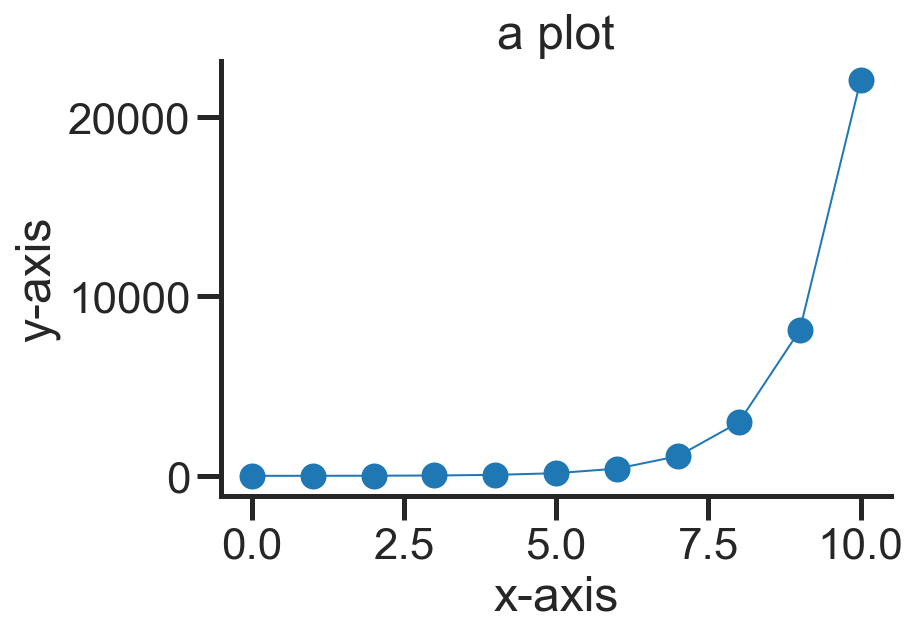

In [54]:
sns.set_context("poster",rc={"lines.linewidth":1})
x = np.linspace(0,10,11)
y = np.exp(x)
fig = plt.figure()
ax = plt.gca()
ax.plot(x,y,'o-');
ax.set(title='a plot',xlabel='x-axis',ylabel='y-axis');

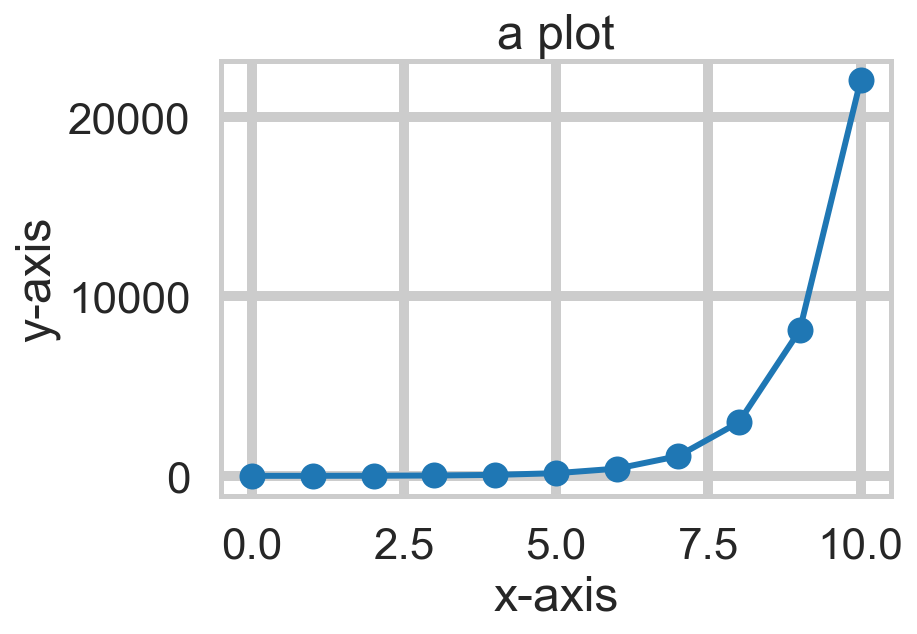

In [60]:
sns.set_style("whitegrid")
sns.set_context("poster",rc={"grid.linewidth":2})
x = np.linspace(0,10,11)
y = np.exp(x)
fig = plt.figure()
ax = plt.gca()
ax.plot(x,y,'o-');
ax.set(title='a plot',xlabel='x-axis',ylabel='y-axis');

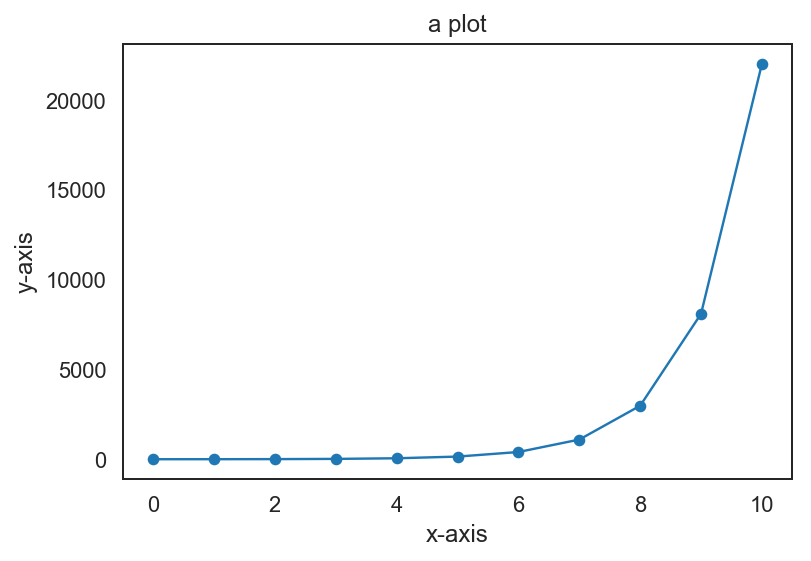

In [63]:
sns.set_style("white")
# note that there are 6(!) font sizes
sns.set_context("paper",rc={"font.size":12,"axes.labelsize":12,"axes.titlesize":12,
                            "xtick.labelsize":11,"ytick.labelsize":11,"legend.fontsize":11})
x = np.linspace(0,10,11)
y = np.exp(x)
fig = plt.figure()
ax = plt.gca()
ax.plot(x,y,'o-');
ax.set(title='a plot',xlabel='x-axis',ylabel='y-axis');

Changing all those font sizes is quite some work. Have a look at the documentation of `sns.set_context` to see if there is an easier way and test this.

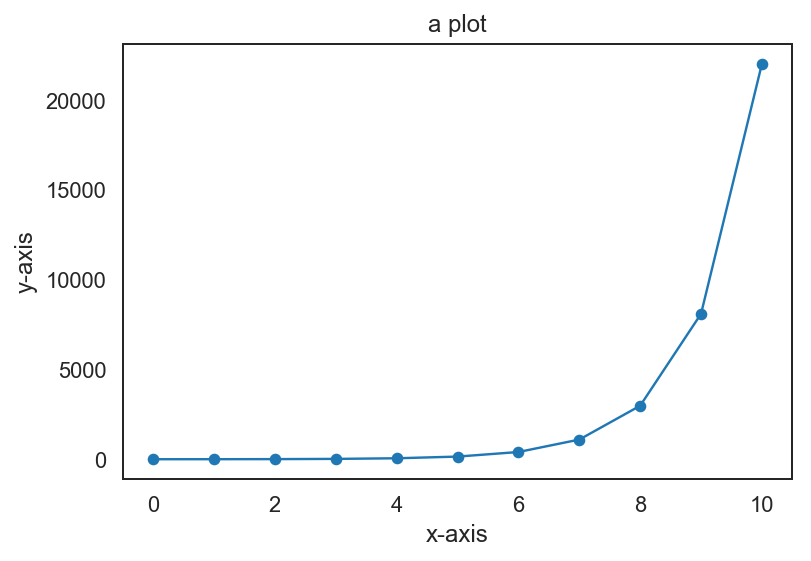

In [86]:
sns.set_style("white")
# use the option font_scale
sns.set_context("paper",font_scale=1.25)
x = np.linspace(0,10,11)
y = np.exp(x)
fig = plt.figure()
ax = plt.gca()
ax.plot(x,y,'o-');
ax.set(title='a plot',xlabel='x-axis',ylabel='y-axis');

# Heatmaps

Colormaps are used to map numbers to colors. What colormap is a good colormap depends on the data and the context. One type of plot in which colormaps are commonly used are heatmaps,. Below we plotted a heatmap using seaborn's `heatmap` function. A similar heatmap could also be creates using plain matplotlib for this, but the `heatmap` function makes it much easier. 


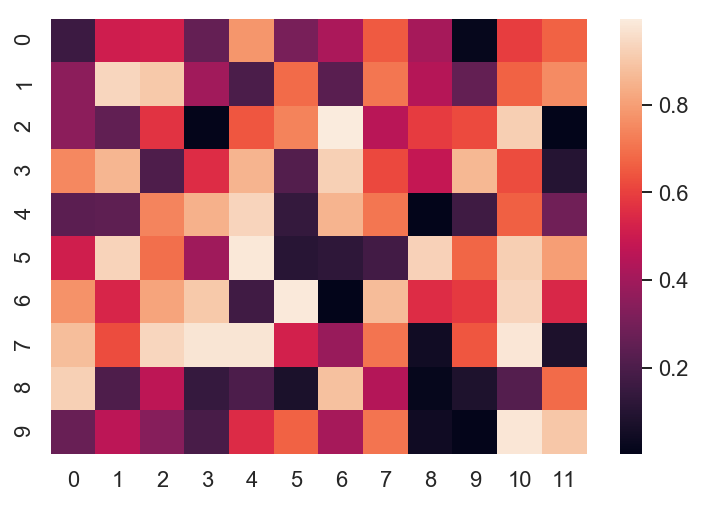

In [75]:
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data)

A single value can make the full heatmap useless.

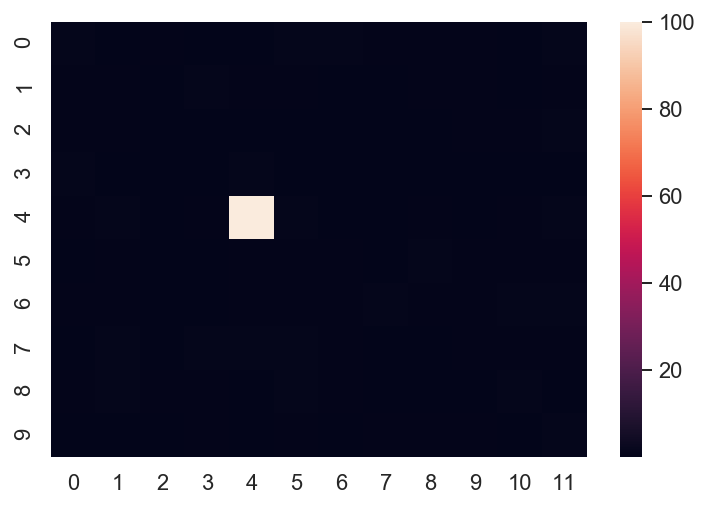

In [79]:
alt_data = np.random.rand(10, 12)
alt_data[4,4] = 100
ax = sns.heatmap(alt_data)

Look for the option `vmax` in the documentation and use it to make this colormap useful. 

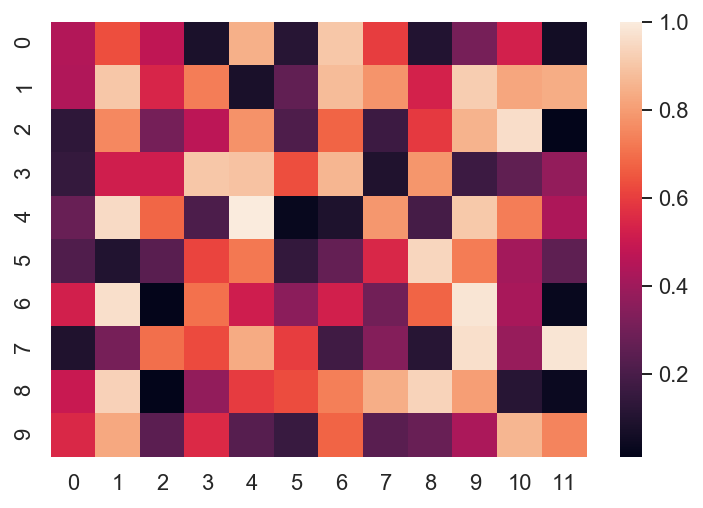

In [87]:
alt_data = np.random.rand(10, 12)
alt_data[4,4] = 100
# as we are only interested in the range between 0 and 1, we set vmax to 1
ax = sns.heatmap(alt_data,vmax=1)

Changing the colormap of the heatmap is done with the `cmap` option: `sns.heatmap(data,cmap="colormap")`, where `"colormap"` refers to one of the many predefined colormaps of matplotlib. Have a look at the colormaps [here](https://matplotlib.org/examples/color/colormaps_reference.html) and try a couple. If you have the time, have a look at this [article](https://matplotlib.org/tutorials/colors/colormaps.html) on how to choose the best colormap for your data. 

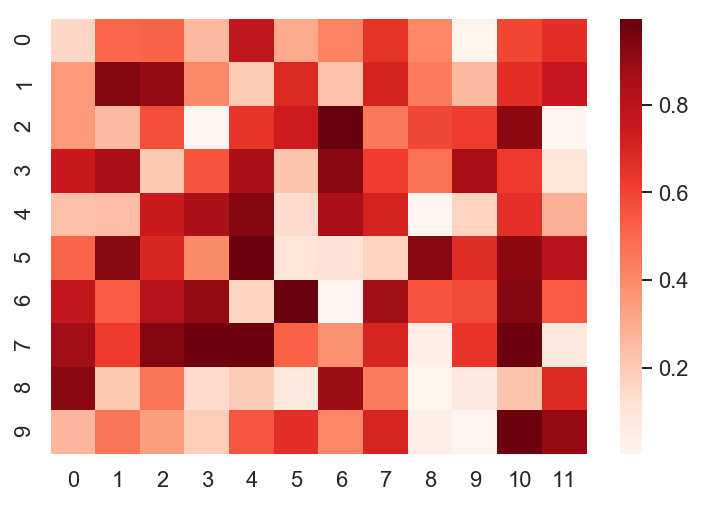

In [77]:
ax = sns.heatmap(uniform_data,cmap='Reds')